<a href="https://colab.research.google.com/github/nigamdivyyanshi16/Exploratory-Data-Analysis-Python/blob/main/Zomato_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zomato has an average of 17.5 million monthly
transacting customers for its food delivery business.e
average monthly active food delivery restaurant
partners on Zomato's platform have also increased by
8.7% year-on-year, from 208,000 to 226,000.You are
working in a data-driven role at Zomato.

You have a
dataset of customers. As a data professional, you
need to analyze the data, perform EDA (Exploratory
Data Analysis) and visualization, and answer the
following questions:

STEP 1: INSTALLATION OF LIBRARIES

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly

STEP 2: IMPORTING LIBRARIES

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

STEP 3: DATA LOADING

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA DATASETS/Zomato data .csv",encoding="unicode_escape")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


STEP 4: BASIC DATA INSPECTION

In [5]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [6]:
df.info()
#does not have any missing values
#rate column which should have been in float data type but can be seen as object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [7]:
#summary statistics
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [ ]:
STEP 5: DATA CLEANING

In [8]:
#CHANGING DATA TYPE OF 'RATE' COLUMN TO FLOAT FROM OBJECT
def handlerate(value):
  value=str(value).split("/")
  value=value[0]
  return float(value)

df['rate']=df['rate'].apply(handlerate)
print(df.head(10))

                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

   rate  votes  approx_cost(for two people) listed_in(type)  
0   4.1    775                          800          Buffet  
1   4.1    787   

In [9]:
#to check any more missing values
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


<Axes: ylabel='votes'>

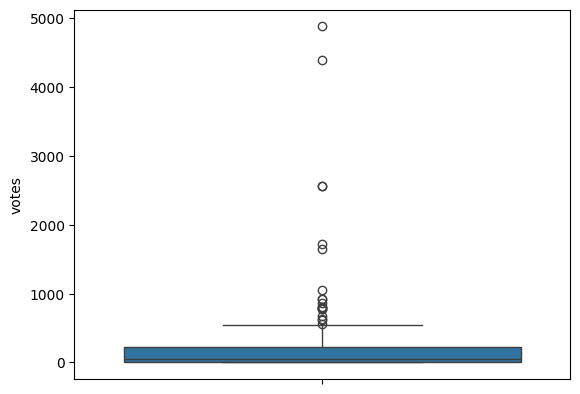

In [13]:
#to check outlier values by boxplot for numerical columns available
sns.boxplot(df['votes'])

#there are outliers however, the value of votes ranges between 0 to 2000+ which can be possible than may be any hotel has 2000 votes by more people.
#hence not working on it

<Axes: ylabel='approx_cost(for two people)'>

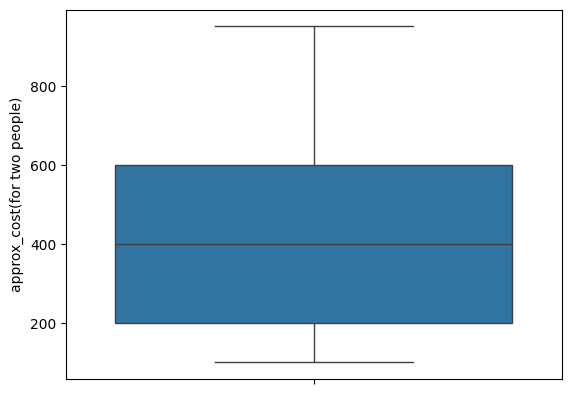

In [15]:
sns.boxplot(df["approx_cost(for two people)"])
#no outliers

1) What type of restaurant do the majority of customers order from?


In [17]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

In [18]:
df['listed_in(type)'].value_counts()

,count
listed_in(type),
Dining,110
Cafes,23
other,8
Buffet,7


In [20]:
df['listed_in(type)'].value_counts().index

Index(['Dining', 'Cafes', 'other', 'Buffet'], dtype='object', name='listed_in(type)')

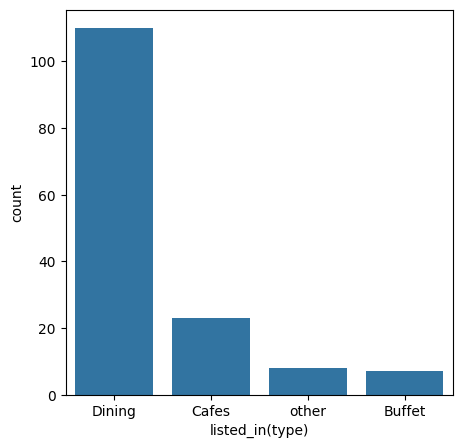

In [21]:
plt.figure(figsize=(5,5))
sns.barplot(df['listed_in(type)'].value_counts())
plt.title("Customers type of Restaurants preference")
plt.show()

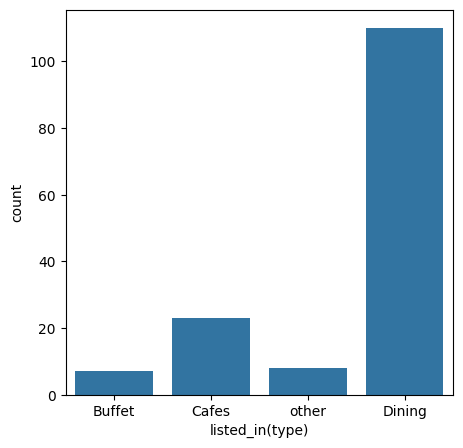

In [22]:
#as bar plot is also giving right analysis however, countplot would be a better approach
#sns.countplot() directly counts occurrences of unique values in a categorical column.
plt.figure(figsize=(5,5))
sns.countplot(x=df['listed_in(type)'])
plt.show()

FINDING: MAJORITY OF RESTAURANT FALLS IN DINING CATEGORIES AND MAJORITY OF CUSTOMERS ORDER FROM DINING TYPE RESTAURANT AND THEN CAFES.

2)How many votes has each type of restaurant received from customers?

In [23]:
total_votes=df.groupby('listed_in(type)').agg({'votes':'sum'})
total_votes

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


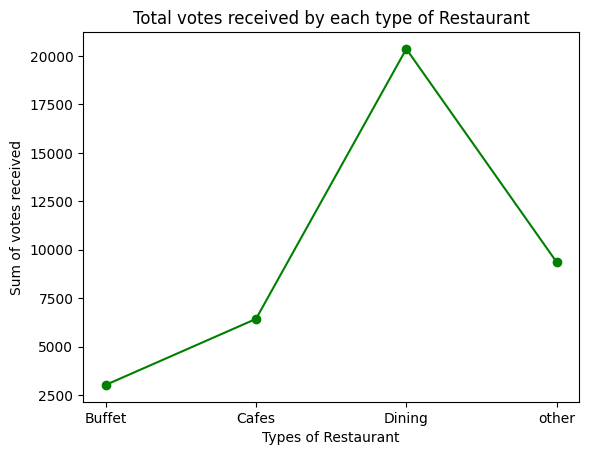

In [29]:
plt.plot(total_votes,c="green",marker="o")
plt.xlabel("Types of Restaurant",fontsize=10)
plt.ylabel("Sum of votes received", fontsize=10)
plt.title("Total votes received by each type of Restaurant")
plt.show()

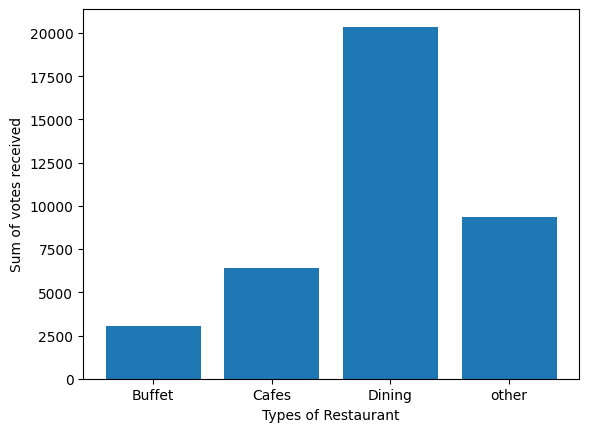

In [28]:
#bar plot for the same
plt.bar(total_votes.index,total_votes['votes'])
#total_votes.index: This is the name of each restaurant type (like "Fast Food," "Cafe," "Fine Dining").
#total_votes['votes']: This is the number of votes each type got. The taller the bar, the more votes!
plt.xlabel("Types of Restaurant",fontsize=10)
plt.ylabel("Sum of votes received", fontsize=10)
plt.show()

FINDINGS: DINING HAS MAXIMUM VOTES

3) What are the ratings that the majority of restaurants have received?

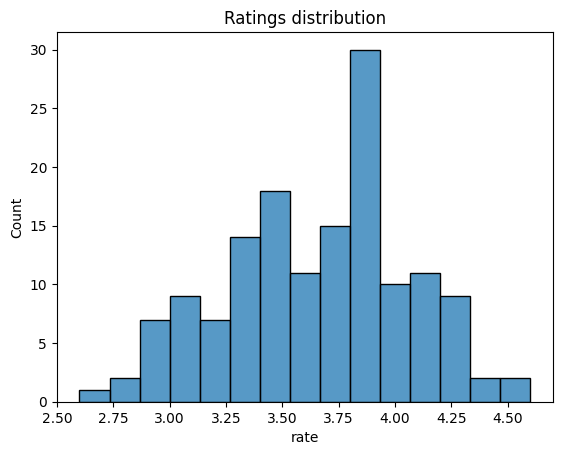

In [31]:
#univariate analysis
#find which rating is the most preferred rating used for most of the restaurants
sns.histplot(df['rate'], bins=15)
plt.title("Ratings distribution")
plt.show()

FINDINGS: MAJORITY OF PREFERRED RATINGS BY CUSTOMERS RANGES BETWEEN 3.75 TO 4.25.

4. Which restaurant received maximum ratings?

In [38]:
maximum_rating = df.groupby(['name']).agg({'rate': 'max'}).sort_values(by='rate',ascending=False).head()
maximum_rating

,rate
name,
Nandhini Deluxe,2.6
Fast And Fresh,2.8
Foodiction,2.8
Aramane Donne Biriyani,2.9
Hotel Andhra Speices,2.9


5. Which restaurant received least ratings?

In [44]:
least_rating = df.groupby(['name']).agg({'rate': 'min'}).sort_values(by='rate',ascending=True).head()
least_rating

,rate
name,
Nandhini Deluxe,2.6
Fast And Fresh,2.8
Foodiction,2.8
Aramane Donne Biriyani,2.9
Hotel Andhra Speices,2.9


In [ ]:
6. Zomato has observed that most couples order most of their food online. What is their
average spending on each order?


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

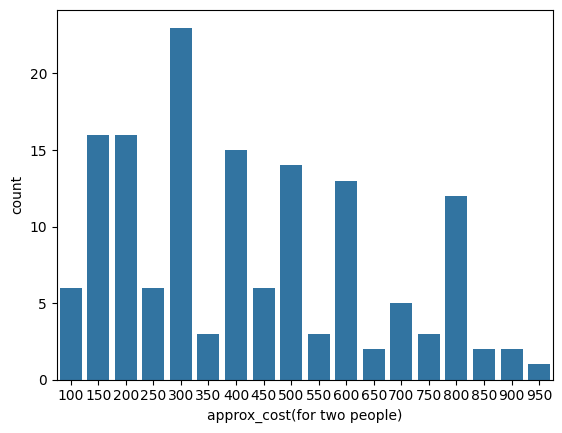

In [49]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

FINDING: ON AN AVERAGE COUPLE SPEND APPROX INR 300 ORDERS.
LEAST ORDER PRICE : INR 950

7.Which mode (online or offline) has received the maximum rating?

In [50]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
